In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import rutinas_AutoInt as ru

from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad

In [3]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [4]:
# cargando datos L=0

##### Lamb=0 #####
radSigmMasa = np.load('Datos/fondo_n1/radSigmMasa_n1.npz', allow_pickle=True)
Sig0R99M99EnergyT = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_n1.npz', allow_pickle=True)

##### Lamb=1 #####
radSigmMasaNP1 = np.load('Datos/fondo_n1/radSigmMasa_n1_Pos.npz', allow_pickle=True)
Sig0R99M99EnergyTNP1 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_n1_Pos.npz', allow_pickle=True)

##### Lamb=-1 #####
radSigmMasaNM1 = np.load('Datos/fondo_n1/radSigmMasa_n1_Neg.npz', allow_pickle=True)
Sig0R99M99EnergyTNM1 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_n1_Neg.npz', allow_pickle=True)

radSigmMasaNM12 = np.load('Datos/fondo_n1/radSigmMasa_Exn1M.npz', allow_pickle=True)
Sig0R99M99EnergyTNM12 = np.load('Datos/fondo_n1/Sig0R99M99EnergyT_Exn1M.npz', allow_pickle=True)

In [5]:
##### L=0 #####
Sig0R99M99Energy = Sig0R99M99EnergyT['arr_0']
radSigmMasa = radSigmMasa['arr_0']

##### L=1 #####
Sig0R99M99EnergyP1 = Sig0R99M99EnergyTNP1['arr_0']
radSigmMasaP1 = radSigmMasaNP1['arr_0']

##### L=-1 #####
Sig0R99M99EnergyM1 = Sig0R99M99EnergyTNM1['arr_0']
radSigmMasaM1 = radSigmMasaNM1['arr_0']

Sig0R99M99EnergyM12 = Sig0R99M99EnergyTNM12['arr_0']
radSigmMasaM12 = radSigmMasaNM12['arr_0']

In [8]:
Sig0R99M99EnergyM1[-1, 0], Sig0R99M99EnergyM1[-1, 1], Sig0R99M99EnergyM1[-1, 2]*4*np.pi

(8.0, 4.474474474474475, 86.93477238745409)

In [6]:
solPlot = [[1.0, 34.41907267947876, 1, -1, 1, 3.16585198, 'DOP853', 1e-13, 1e-15, 0.9174056202527101],
           [1.0, 32.26875444729248, 1, 0, 1, 3.34852906, 'DOP853', 1e-13, 1e-15, 1.2099590019792874],
           [1.0, 28.039009997530076, 1, 1, 1, 3.54927146, 'DOP853', 1e-13, 1e-15, 1.6676158758718198],
           ]

solPlotAu = [[8.5, 10.813496185389234, 1, 0, 1, 1.14853599, 'DOP853', 1e-13, 1e-15, 10.284651516823958],
[9.0, 10.964417071053244, 1, 0, 1, 1.11617635, 'DOP853', 1e-13, 1e-15, 10.88963101781359],
[9.5, 10.500023492918213, 1, 0, 1, 1.08640629, 'DOP853', 1e-13, 1e-15, 11.494610518803247],
[10.0, 10.038176836185638, 1, 0, 1, 1.05889786, 'DOP853', 1e-13, 1e-15, 12.09959001979289],
[10.5, 9.965562265390512, 1, 0, 1, 1.0333785, 'DOP853', 1e-13, 1e-15, 12.704569520782526]]


soluciones_FondoN = [
[8.25, 20.14378182397762, 1, -1, 1, 0.76142823, 'DOP853', 1e-13, 1e-15, 2.422281378535987],
[8.5, 14.786207323943152, 1, -1, 1, 0.74244316, 'DOP853', 1e-13, 1e-15, 2.4280881527172387],
[8.75, 14.465599462707763, 1, -1, 1, 0.72436365, 'DOP853', 1e-13, 1e-15, 2.4324196679554335],
[9.0, 18.261637222373416, 1, -1, 1, 0.70712669, 'DOP853', 1e-13, 1e-15, 2.4353170623193146],
[9.25, 13.932113523356135, 1, -1, 1, 0.69067502, 'DOP853', 1e-13, 1e-15, 2.436818010897661],
[9.5, 13.653222342366544, 1, -1, 1, 0.67495648, 'DOP853', 1e-13, 1e-15, 2.436957147740281],
[10.5, 17.94187634134773, 1, -1, 1, 0.61851929, 'DOP853', 1e-13, 1e-15, 2.4245007165942223],
[11, 16.21768073173295, 1, -1, 1, 0.59363478, 'DOP853', 1e-13, 1e-15, 2.4108316093171624],
[12, 12.959217339736323, 1, -1, 1, 0.54932561, 'DOP853', 1e-13, 1e-15, 2.3694886561797004],
[13, 18.987821888767478, 1, -1, 1, 0.5110655, 'DOP853', 1e-13, 1e-15, 2.3104277698711284]
]

In [19]:
R99val = np.concatenate([Sig0R99M99EnergyM1[:-2, 1], Sig0R99M99EnergyM12[:, 1], [2]])
M99val = np.concatenate([Sig0R99M99EnergyM1[:-2, 2], Sig0R99M99EnergyM12[:, 2], [5.1]])

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_19334/2035741102.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


Text(3, 35, '$\\sigma_0\\to 0$')

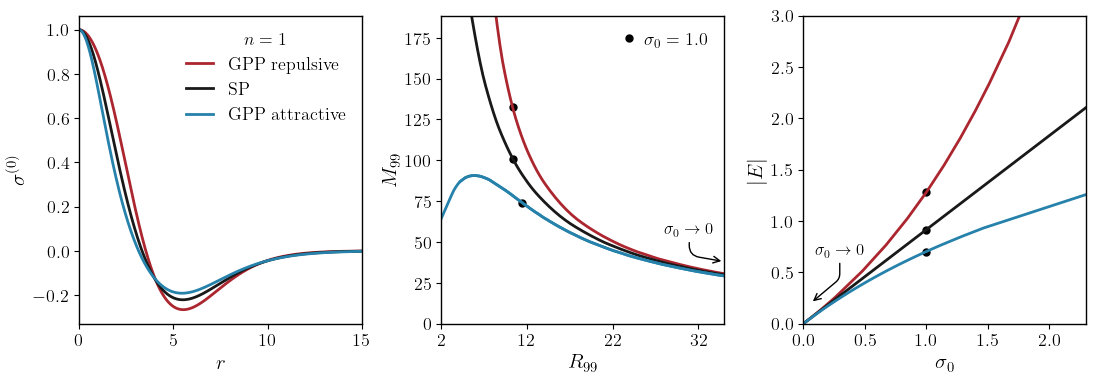

In [31]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fac = 4*np.pi

#profilesNumb = len(radSigmMasaN_P)

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.28))

#for i in kval:
i = 36
#ax[0].plot(radSigmMasaP1[i][0], radSigmMasaP1[i][1], color=col[0], label=r'$\sigma_0 = %5.4f$'%radSigmMasaP1[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[2])
ax[0].plot(rD, sD, color=col[3], label=r'GPP repulsive')  # label=r'$\sigma_0 = %5.4f$'%radSigmMasaP1[i][1][0]
ax[1].plot(Sig0R99M99EnergyP1[i, 1], fac*Sig0R99M99EnergyP1[i, 2], ls='', c='k', marker='o', markersize=5, label=r'$\sigma_0 = %2.1f$'%sD[0])
ax[2].plot(sD[0], np.abs(en), ls='', c='k', marker='o', markersize=5)

i = 35
#ax[0].plot(radSigmMasa[i][0], radSigmMasa[i][1], color=col[2], label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[1])
ax[0].plot(rD, sD, color=col[0], label=r'SP')  # , label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0]
ax[1].plot(Sig0R99M99Energy[i, 1], fac*Sig0R99M99Energy[i, 2], c='k', marker='o', markersize=5)
#ax[1].plot(Sig0R99M99EnergyC[i, 1], Sig0R99M99EnergyC[i, 2], c='k', marker='o', markersize=5)
ax[2].plot(sD[0], np.abs(en), ls='', c='k', marker='o', markersize=5)

i = 71
#ax[0].plot(radSigmMasaM1[i][0], radSigmMasaM1[i][1], color=col[3], label=r'$\sigma_0 = %5.4f$'%radSigmMasaM1[i][1][0])
en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(solPlot[0])
ax[0].plot(rD, sD, color=col[2], label=r'GPP attractive')
ax[1].plot(Sig0R99M99EnergyM1[i, 1], fac*Sig0R99M99EnergyM1[i, 2], c='k', marker='o', markersize=5)
#ax[1].plot(Sig0R99M99EnergyM1C[i, 1], Sig0R99M99EnergyM1C[i, 2], c='k', marker='o', markersize=5)
ax[2].plot(sD[0], np.abs(en), ls='', c='k', marker='o', markersize=5)

#########
fM = interp1d(Sig0R99M99EnergyP1[:, 1], Sig0R99M99EnergyP1[:, 2], kind='quadratic')
Rval = np.linspace(Sig0R99M99EnergyP1[0, 1], Sig0R99M99EnergyP1[-1, 1], 5000)
ax[1].plot(Rval, fac*fM(Rval), color=col[3], ls='-')#, label=r'GPP repulsive')
#ax[1].plot(Sig0R99M99EnergyP1[:, 1], fac*Sig0R99M99EnergyP1[:, 2], color=col[3], ls='-')#, label=r'GPP repulsive')

#temp1 = np.concatenate((Sig0R99M99Energy[:, 1], Sig0R99M99EnergyC[1:, 1]))
#temp2 = np.concatenate((Sig0R99M99Energy[:, 2], Sig0R99M99EnergyC[1:, 2]))
#ax[1].plot(temp1, temp2, color=col[2], ls='-')
fM = interp1d(Sig0R99M99Energy[:, 1], Sig0R99M99Energy[:, 2], kind='quadratic')
Rval = np.linspace(Sig0R99M99Energy[0, 1], Sig0R99M99Energy[-1, 1], 5000)
ax[1].plot(Rval, fac*fM(Rval), color=col[0], ls='-')#, 
#ax[1].plot(Sig0R99M99Energy[:, 1], fac*Sig0R99M99Energy[:, 2], color=col[0], ls='-')#, label=r'SP')

#temp1 = np.concatenate((Sig0R99M99EnergyM1[:-1, 1], Sig0R99M99EnergyM1C[1:, 1]))
#temp2 = np.concatenate((Sig0R99M99EnergyM1[:-1, 2], Sig0R99M99EnergyM1C[1:, 2]))
#ax[1].plot(temp1, temp2, color=col[3], ls='-')
ax[1].plot(Sig0R99M99EnergyM1[:-2, 1], fac*Sig0R99M99EnergyM1[:-2, 2], color=col[2], ls='-')#, label=r'GPP attractive')
ax[1].plot(R99val, fac*M99val, color=col[2], ls='-')#, label=r'GPP repulsive')

ax[2].plot(Sig0R99M99EnergyP1[:, 0], np.abs(Sig0R99M99EnergyP1[:, 3]), color=col[3], ls='-')
ax[2].plot(Sig0R99M99Energy[:, 0], np.abs(Sig0R99M99Energy[:, 3]), color=col[0], ls='-')

#temp1 = np.concatenate((Sig0R99M99EnergyM1[:, 0], Sig0R99M99EnergyM1C[1:, 0]))
#temp2 = np.concatenate((Sig0R99M99EnergyM1[:, 3], Sig0R99M99EnergyM1C[1:, 3]))
#ax[2].plot(temp1, np.abs(temp2), color=col[3], ls='-')
ax[2].plot(Sig0R99M99EnergyM1[:, 0], np.abs(Sig0R99M99EnergyM1[:, 3]), color=col[2], ls='-')

ax[0].set_xlim(0, 15)

ax[1].set_xlim(2., 35)
ax[1].set_ylim(0, fac*15)
ax[1].set_xticks([2, 12, 22, 32])

ax[2].set_xlim(0.0, 2.3)
ax[2].set_ylim(0, 3)

ax[0].set_xlabel(r'$r$')
ax[0].set_ylabel(r'$\sigma^{(0)}$')
#ax[0].set_xlabel(r'$r \,[2mc/(\hbar\Lambda^{1/2})]$')
#ax[0].set_ylabel(r'$\sigma \,[c_2]$')

ax[1].set_xlabel(r'$R_{99}$')
ax[2].set_xlabel(r'$\sigma_0$')
#ax[1].set_xlabel(r'$R_{99}\,[2mc/(\hbar\Lambda^{1/2})]$')
#ax[2].set_xlabel(r'$\sigma_0\,[c_2]$')

ax[1].set_ylabel(r'$M_{99}$')
ax[2].set_ylabel(r'$|E|$')
#ax[1].set_ylabel(r'$M(R_{99})\,[c\hbar/(Gm\Lambda^{1/2})]$')
#ax[2].set_ylabel(r'$|E|\,[2c^2m/\Lambda]$')

#ax[1].axvspan(xmin=-1e-02, xmax=1e-02, ymin=0, ymax=1, color='gray')

ax[1].legend(frameon=False, fontsize=13, handlelength=0.1)
ax[0].legend(loc='upper right', frameon=False, title=r'$n=1$', fontsize=13)


#ax[1].plot(Sig0R99M99EnergyM1[-7, 1], fac*Sig0R99M99EnergyM1[-7, 2], 'k*')
ax[1].annotate(r'$\sigma_0\to 0$', xy=(35, 38), xytext=(-43, 20), fontsize=12, textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                                                   connectionstyle="angle, angleA=90,angleB=-10, rad=10"))

ax[2].annotate(r'$\sigma_0\to 0$', xy=(0.06, 0.2), xytext=(3, 35), fontsize=12, textcoords='offset points', arrowprops=dict(arrowstyle="->",
                                                                   connectionstyle="angle, angleA=-90, angleB=40, rad=5"))

In [32]:
fig.savefig('Fondo_n1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [ ]:
## Funcional de Energia

In [8]:
dataEnfM1, dataTfM1, dataFfM1 = [], [], []

Lamb = -1  # autointeraccion
for i in radSigmMasaM1: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    dataEnfM1.append([sig[0], Enf])
    dataTfM1.append([sig[0], Tfval])
    dataFfM1.append([sig[0], Ffval])

dataEnfM1 = np.array(dataEnfM1)
dataTfM1 = np.array(dataTfM1)
dataFfM1 = np.array(dataFfM1)

/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:180: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tval = 4*np.pi*quad(intf, rmin, rfin)[0]
/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:193: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, dis

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_58554/1119590886.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


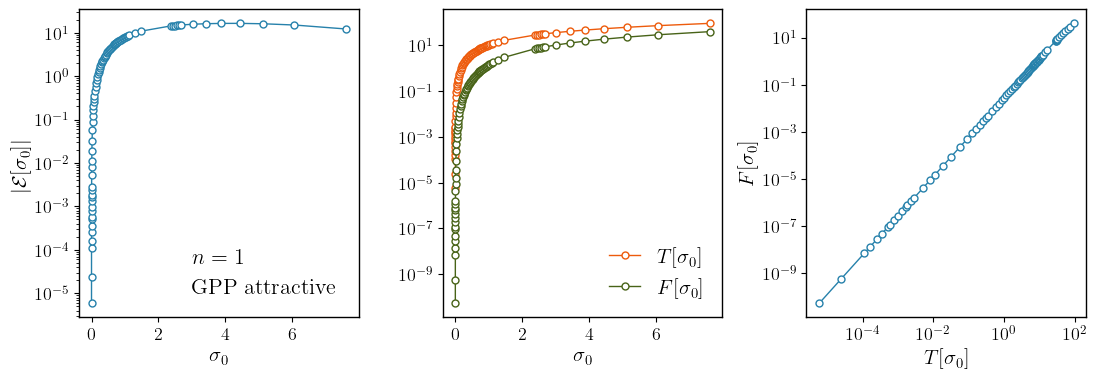

In [8]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


ax[0].plot(dataEnfM1[:-2, 0], np.abs(dataEnfM1[:-2, 1]), ls='-', lw=1, 
           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].text(x=3, y=5e-05, s=r'$n=1$')
ax[0].text(x=3, y=1e-05, s=r'GPP attractive')#r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfM1[:-2, 1], dataFfM1[:-2, 1], c=col[2], ls='-', lw=1, marker='o', markersize=5, mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[1].legend(frameon=False)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_58554/3003573040.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


(-18.0, 18.0)

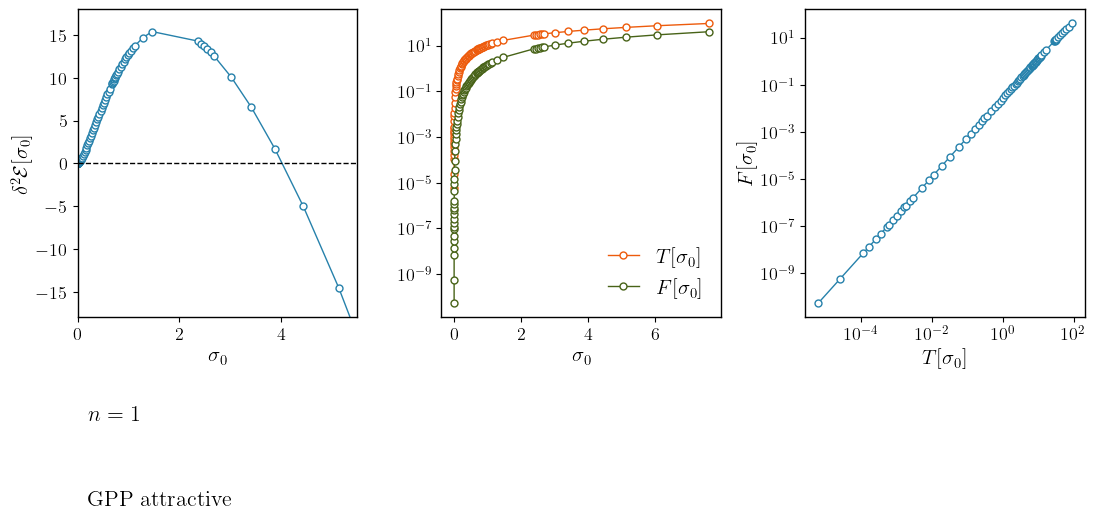

In [16]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


#ax[0].plot(dataEnfM1[:-2, 0], np.abs(dataEnfM1[:-2, 1]), ls='-', lw=1, 
#           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].plot(dataTfM1[:-2, 0], 2*dataTfM1[:-2, 1]-6*dataFfM1[:-2, 1], ls='-', lw=1, 
           color=col[2], marker='o', markersize=5, mfc='white')
ax[0].text(x=0.2, y=-30, s=r'$n=1$')
ax[0].text(x=0.2, y=-40, s=r'GPP attractive')#r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfM1[:-2, 0], dataTfM1[:-2, 1], ls='-', lw=1, 
           color=col[6], marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfM1[:-2, 0], dataFfM1[:-2, 1], ls='-', lw=1,
           color=col[5], marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfM1[:-2, 1], dataFfM1[:-2, 1], c=col[2], ls='-', lw=1, marker='o', markersize=5, mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
#ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$\delta^2 \mathcal{E}[\sigma_0]$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

#ax[0].vlines(x=1, ymin=-6, ymax=2, ls='--', lw=1, color='k')
ax[0].hlines(y=0, xmin=0, xmax=10, ls='--', lw=1, color='k')

ax[1].legend(frameon=False)
ax[0].set_xlim(0, 5.5)
ax[0].set_ylim(-9*2, 9*2)


In [10]:
Sig0R99M99EnergyM1[-7, 0]

3.8773057509493483

In [11]:
np.savetxt('F_G_n1.dat', np.array([dataTfM1[:-2, 0], dataTfM1[:-2, 1], dataFfM1[:-2, 1]]).T)

In [11]:
fig.savefig('EreL_n1LambM1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [6]:
dataEnfP1, dataTfP1, dataFfP1 = [], [], []

Lamb = 1  # autointeraccion
for i in radSigmMasaP1: #radSigmMasa, radSigmMasaM1
    r, sig, _ = i
   
    Enf, Tfval, Ffval = ru.EnFuncion(i, Lamb)
    
    dataEnfP1.append([sig[0], Enf])
    dataTfP1.append([sig[0], Tfval])
    dataFfP1.append([sig[0], Ffval])

dataEnfP1 = np.array(dataEnfP1)
dataTfP1 = np.array(dataTfP1)
dataFfP1 = np.array(dataFfP1)

/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:180: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Tval = 4*np.pi*quad(intf, rmin, rfin)[0]
/Volumes/Datos/Trabajo/Proyectos_Prof_Olivier/Newtonian_Stability/Autointeracción/rutinas_AutoInt.py:180: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Tval = 4*np.pi*quad(intf, rmin, rfin)[0]


/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_20664/1763198823.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),


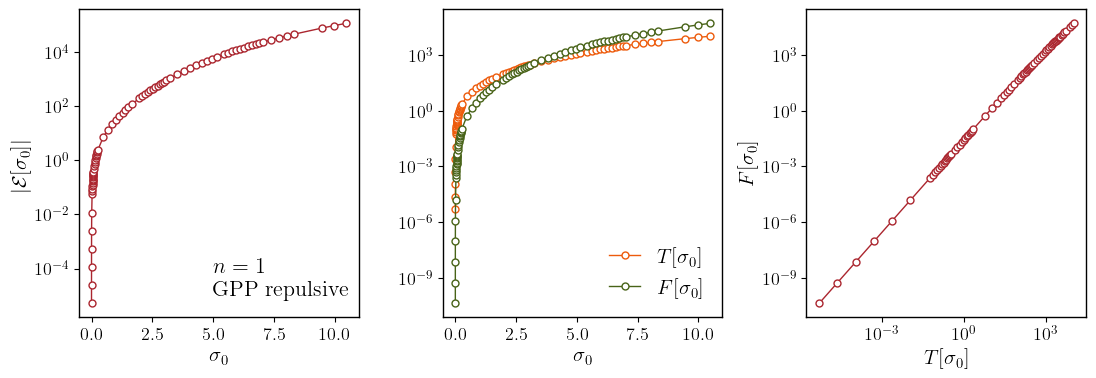

In [7]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

col2 = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.3))


ax[0].plot(dataEnfP1[:-2, 0], np.abs(dataEnfP1[:-2, 1]), ls='-', lw=1, marker='o', markersize=5, color=col[3], mfc='white')
ax[0].text(x=5, y=7e-05, s=r'$n=1$')
ax[0].text(x=5, y=1e-05, s=r'GPP repulsive') #s=r'$\Lambda=%d$'%Lamb)

ax[1].plot(dataTfP1[:-2, 0], dataTfP1[:-2, 1], c=col[6], ls='-', lw=1, marker='o', markersize=5, mfc='white', label=r'$T[\sigma_0]$')
ax[1].plot(dataFfP1[:-2, 0], dataFfP1[:-2, 1], c=col[5], ls='-', lw=1, marker='o', markersize=5, mfc='white', label=r'$F[\sigma_0]$')

ax[2].plot(dataTfP1[:-2, 1], dataFfP1[:-2, 1], c=col[3], ls='-', lw=1, marker='o', markersize=5,mfc='white')

#ax[0].set_ylim(-50, 5)
#ax[0].set_xlim(0, 6)
ax[0].set_yscale('log')

#ax[1].set_ylim(-3, 250)
ax[1].set_yscale('log')

#ax[2].set_ylim(-3, 250)
ax[2].set_xscale('log')
ax[2].set_yscale('log')


ax[0].set_ylabel(r'$|\mathcal{E}[\sigma_0]|$')
ax[0].set_xlabel(r'$\sigma_0$')

ax[1].set_xlabel(r'$\sigma_0$')

ax[2].set_xlabel(r'$T[\sigma_0]$')
ax[2].set_ylabel(r'$F[\sigma_0]$')

ax[1].legend(frameon=False)

In [14]:
fig.savefig('EreL_n1LambP1.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

In [ ]:
## Autovalores 

In [4]:
# cargando datos L=0
# [dato1, dato2, ...]  -> dato = [s0, AutoVal, AutoVec] -> AutoVal = [a1, a2, ...], AutoVec -> [[vec1], [vec2]]

##### Lamb=0 #####
datan1 = np.load('AutovaloresSep/ReEing_n1_L0.npy', allow_pickle=True)
dataIn = np.loadtxt('Datos/espectro_n1/Data_0.dat', unpack=True)

##### Lamb=1 #####
#datan1P = np.load('AutovaloresSep/ReEingP_n1_L0.npy', allow_pickle=True)
datan1P = np.load('AutovaloresSep/ReEingP_n1_L0_2.npy', allow_pickle=True)
dataInP1 = np.loadtxt('Datos/n1_L0_P/Data_1_0.dat', unpack=True)

##### Lamb=-1 #####
datan1M = np.load('AutovaloresSep/ReEingM_n1_L0.npy', allow_pickle=True)
dataInM1 = np.loadtxt('Datos/espectroN_n1/Data_-1.dat', unpack=True)

# datos convergencia isla Lamb=1
conveg = np.load('Conv_isla/L0/Convergencia_Isla_L0.npy', allow_pickle=True)
conveg2 = np.load('Conv_Part_Final_n1/Convergencia_PartFinal_L0.npy', allow_pickle=True)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_3286/2276797218.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),


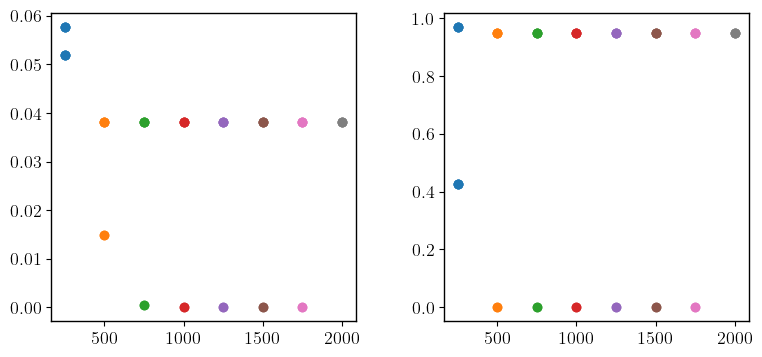

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.29))

for i in conveg[0]:
    s0, Npts, temp1, temp2 = i
    num = len(temp1)
    ax[0].plot([Npts]*num, temp1, 'o')
    ax[1].plot([Npts]*num, temp2, 'o')

#ax[0].set_yscale('log')
#ax[1].set_yscale('log')
#conveg[0][0]

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_3056/1084895953.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),


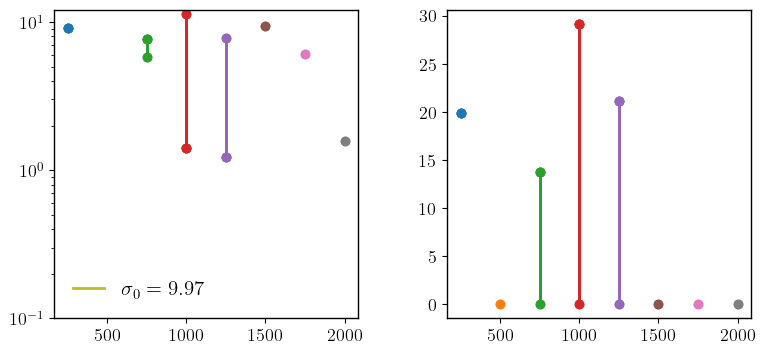

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.29))

for i in conveg2[-1]:
    s0, Npts, temp1, temp2 = i
    num = len(temp1)
    ax[0].plot([Npts]*num, temp1, '-o')
    ax[1].plot([Npts]*num, temp2, '-o')

#ax[1].set_yscale('log')
#conveg[0][0]
ax[0].plot([], [], '', label=r'$\sigma_0 = %2.2f$'%s0)
ax[0].legend(frameon=False)
ax[0].set_ylim(1e-01, 12)
ax[0].set_yscale('log')

In [5]:
dats0, datEing, dataEingVect = ru.DatSepara(datan1)  # Lamb=0
dats0P, datEingP, dataEingVectP = ru.DatSepara(datan1P)  # Lamb=1
dats0M, datEingM, dataEingVectM = ru.DatSepara(datan1M)  # Lamb=-1

In [7]:
# nulo

# filtrando
Autovalores2 = []
for i in datEing:
    ind1 = np.abs(np.imag(i))>1e-10
    ind2 = np.abs(np.real(i))<1e3
    ind = ind1*ind2
    Autovalores2.append(i[ind])

In [8]:
np.save('AutovN1.npy', np.array([dats0, Autovalores2], dtype=object))

In [9]:
# negativo

# filtrando
Autovalores2M = []
for i in datEingM:
    ind1 = np.abs(np.imag(i))>1e-10
    ind2 = np.abs(np.real(i))<1e3
    ind = ind1*ind2
    Autovalores2M.append(i[ind])

In [10]:
np.save('AutovN1M.npy', np.array([dats0M, Autovalores2M], dtype=object))

In [11]:
# positivo

# filtrando
Autovalores2P = []
for i in datEingP:
    ind1 = np.abs(np.imag(i))>1e-10
    ind2 = np.abs(np.real(i))<1e3
    ind = ind1*ind2
    Autovalores2P.append(i[ind])

In [12]:
np.save('AutovN1P.npy', np.array([dats0P, Autovalores2P], dtype=object))

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_2817/368758580.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),


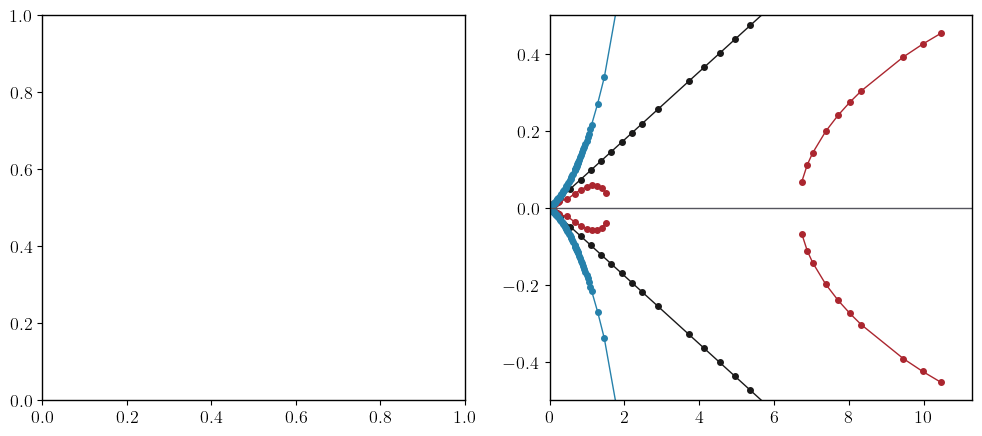

In [15]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.2))

datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0)
for i in range(ncasos):
    y = Autovalores2[i]
    x = dats0[i]
    #
    temp = ru.roundElem(y)
    if temp is not None:
        if len(temp[0])>1:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[0], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[0], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[0], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[0], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[0])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[0], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[0])

####
datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0P)
for i in range(ncasos):
    y = Autovalores2P[i]
    x = dats0P[i]
    #
    temp = ru.roundElem(y)
    if temp is not None:
        if len(temp[0])>1:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[3], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[3], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[3], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[3], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[3])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[3], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[3])

#####

datp1, datp2 = [], []
Mdatp1, Mdatp2 = [], []
ncasos = len(dats0M)
for i in range(ncasos):
    y = Autovalores2M[i]
    x = dats0M[i]
    #
    temp = ru.roundElem(y, dec=8)
    if temp is not None:
        if len(temp[0])>1 and len(temp[0])<3:
            t1, t2 = temp[0]
            i1, i2 = temp[1]
            datp1.append([x, t1, i1])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, -t1, i1])
            Mdatp2.append([x, -t2, i2])
        elif len(temp[0])==1:
            t2, = temp[0]
            i2, = temp[1]
            datp1.append([x, None, None])
            datp2.append([x, t2, i2])
            Mdatp1.append([x, None, None])
            Mdatp2.append([x, -t2, i2])
    else:
        datp1.append([x, None, None])
        datp2.append([x, None, None])
        Mdatp1.append([x, None, None])
        Mdatp2.append([x, None, None])
    
    if temp is not None:
        if len(temp[0])>1:
            ax[1].plot(x, t1, x, -t1, ls='', color=col[2], marker='o', markersize=4, alpha=0.5)
            ax[1].plot(x, t2, x, -t2, ls='', color=col[2], marker='o', markersize=4)
        elif len(temp[0])==1:
            ax[1].plot(x, t2, x, -t2, ls='', color=col[2], marker='o', markersize=4)

    #ax[1].plot([x]*naut, y, ls='', color=col[3], marker='o', markersize=4)

datp1 = np.array(datp1)
datp2 = np.array(datp2)
Mdatp1 = np.array(Mdatp1)
Mdatp2 = np.array(Mdatp2)
ax[1].plot(datp1[:, 0], datp1[:, 1], lw=1, color=col[2], alpha=0.5)
ax[1].plot(datp2[:, 0], datp2[:, 1], lw=1, color=col[2])
ax[1].plot(Mdatp1[:, 0], Mdatp1[:, 1], lw=1, color=col[2], alpha=0.5)
ax[1].plot(Mdatp2[:, 0], Mdatp2[:, 1], lw=1, color=col[2])


######

#plt.yscale('log')
ax[1].set_xlim(0, 11.3)
ax[1].set_ylim(-.5, .5)

ax[1].hlines(y=0, xmin=0, xmax=11.5, ls='-', lw=1, color='#55555e')

In [66]:
#AutoValNot, AutoVectNot = ru.choosing(datEing, dataEingVect, dataIn, Rtol=3e-04, Atol=3e-04, NoTriv=False)
#AutoValNotP, AutoVectNotP = ru.choosing(datEingP, dataEingVectP, dataInP1, Rtol=8e-03, Atol=8e-03, NoTriv=False)
AutoValNotM, AutoVectNotM = ru.choosing(datEingM[:-5], dataEingVectM[:-5], dataInM1[:-5], Rtol=8e-03, Atol=8e-03, NoTriv=False)

In [45]:
ModoInesN1Lamb0 = 0.00148347+0.00979587j
ModoEsca = lambda M, lval: lval*M**2

#Sig0R99M99EnergyM1[i, 1], Sig0R99M99EnergyM1[i, 2]

datosEsca = []
for i in range(len(Sig0R99M99Energy)):
    temp = ModoEsca(Sig0R99M99Energy[i, 2], ModoInesN1Lamb0)
    datosEsca.append([Sig0R99M99Energy[i, 0], temp])

for i in solPlotAu:
    en, Mas, rD, sD, dsD, uD, duD, cer0, LamV = ru.profilesFromSolut(i)
    temp = ModoEsca(Mas, ModoInesN1Lamb0)
    datosEsca.append([sD[0], temp])

datosEsca = np.array(datosEsca)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_9248/3957744180.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5.),
/Users/armando/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


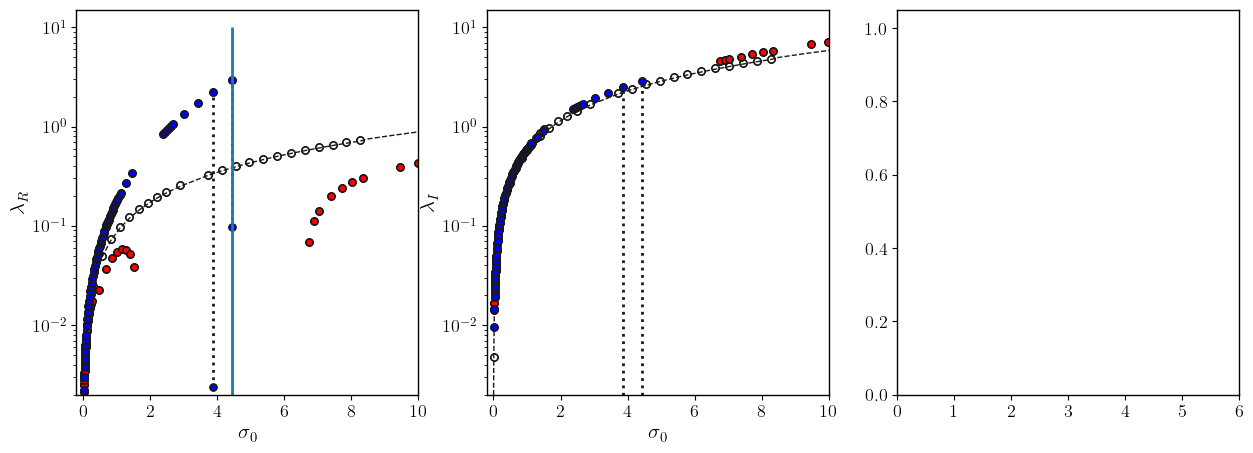

In [67]:
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0.0, wspace=.2))

ax[0].set_yscale('log')
ax[1].set_yscale('log')

Ntot = len(AutoValNot)
for i in range(Ntot):
    x, _, _ = dataIn[i]
    y = AutoValNot[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=':', marker='o', markersize=5, c=col[0], mfc='white') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=':', marker='o', markersize=5, c=col[0], mfc='white') #, c=col[k])

ax[0].plot(datosEsca[:,0], np.real(datosEsca[:,1]), ls='--', lw=1, c=col[0])
ax[1].plot(datosEsca[:,0], np.imag(datosEsca[:,1]), ls='--', lw=1, c=col[0])

Ntot = len(AutoValNotP)
for i in range(Ntot):
    x, _, _ = dataInP1[i]
    y = AutoValNotP[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    #print(y)
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=':', marker='o', markersize=5, c=col[0], mfc='red') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=':', marker='o', markersize=5, c=col[0], mfc='red') #, c=col[k])
    #x2, y2 = radSigmMasaP2[i][0], radSigmMasaP2[i][1]
    #for j in AutoVectNot[i]:
    #    rval, datA, datB = j
    #    cte = x/np.abs(datB[0]).max()
        #ax[2].plot(rval[1:-1], np.real(datB[0])/np.real(datB[0][0]), lw=0.5, label=r'$\sigma_0=%3.2f$'%x) # , c=col[k]
        #ax[2].plot(x2, y2/y2[0], '--', lw=0.5) # , c=col[k]
    #k += 1

Ntot = len(AutoValNotM)
#k = 0
for i in range(Ntot):
    x, _, _ = dataInM1[i]
    y = AutoValNotM[i]
    yR = np.abs(np.real(y))
    yI = np.abs(np.imag(y))
    #print(y)
    Neing = len(yR)  
    ax[0].plot([x]*Neing, yR, ls=':', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    ax[1].plot([x]*Neing, yI, ls=':', marker='o', markersize=5, c=col[0], mfc='blue') #, c=col[k])
    #x2, y2 = radSigmMasaP2[i][0], radSigmMasaP2[i][1]
    #for j in AutoVectNot[i]:
    #    rval, datA, datB = j
    #    cte = x/np.abs(datB[0]).max()
        #ax[2].plot(rval[1:-1], np.real(datB[0])/np.real(datB[0][0]), lw=0.5, label=r'$\sigma_0=%3.2f$'%x) # , c=col[k]
        #ax[2].plot(x2, y2/y2[0], '--', lw=0.5) # , c=col[k]
    #k += 1
    

ax[0].set_ylabel(r'$\lambda_{R}$')
ax[1].set_ylabel(r'$\lambda_{I}$')
ax[0].set_xlabel(r'$\sigma_0$')
ax[1].set_xlabel(r'$\sigma_0$')

ax[0].set_xlim(-0.2, 10)
ax[0].set_ylim(2e-3, 15)

ax[1].set_xlim(-0.2, 10)
ax[1].set_ylim(2e-3, 15)

ax[2].set_xlim(0, 6)
ax[2].set_ylim(0, 1.05)
ax[0].legend(frameon=False)

ax[0].vlines(x=4.435127186635542, ymin=1e-05, ymax= 10)

In [52]:
AutoValNotM[-1]

[(-0.09713287557822692-3.3476866747862998e-12j),
 (0.09713287557822692-3.3476866747862998e-12j),
 (-2.9138991170002684+2.8804463223507595j),
 (2.9138991170002684+2.8804463223507595j),
 (-2.9138991170011495-2.8804463223506094j),
 (2.9138991170011495-2.8804463223506094j)]

In [30]:
AutoVectNotM[-1][0]

[array([0.00000000e+00, 1.01298799e-03, 4.05195130e-03, ...,
        6.39585400e+03, 6.39585703e+03, 6.39585805e+03]),
 [array([1.39157280e-12-4.15742272e-02j, 1.39136750e-12-4.15676351e-02j,
         1.39035061e-12-4.15390815e-02j, ...,
         1.78486033e-21+5.30500318e-21j, 9.10679970e-22+2.68545998e-21j,
         2.39874699e-22+3.54589851e-22j])],
 [array([-5.10651729e-01-4.18893272e-13j, -5.10623201e-01-4.05331334e-13j,
         -5.10499610e-01-4.02894210e-13j, ...,
         -5.76157942e-21-4.47373147e-21j, -2.69422318e-21-5.55043277e-22j,
         -8.71119938e-22-4.44126567e-22j])]]

In [56]:
cte = radSigmMasaM1[i][1][0]/np.abs(AutoVectNotM[-1][0][2][0]).max()
cte
np.isclose((AutoVectNotM[-1][0][2][0]*cte)[0], 0.+0.j, rtol=7e-03, atol=7e-03)

False

In [58]:
(AutoVectNotM[-1][0][2][0]*cte)[0]

(-4.435127186635542-3.638183981145667e-12j)

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_9248/2784102700.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot((AutoVectNotM[-2][0][0])[1:-1], np.imag(AutoVectNotM[-2][0][1][0]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


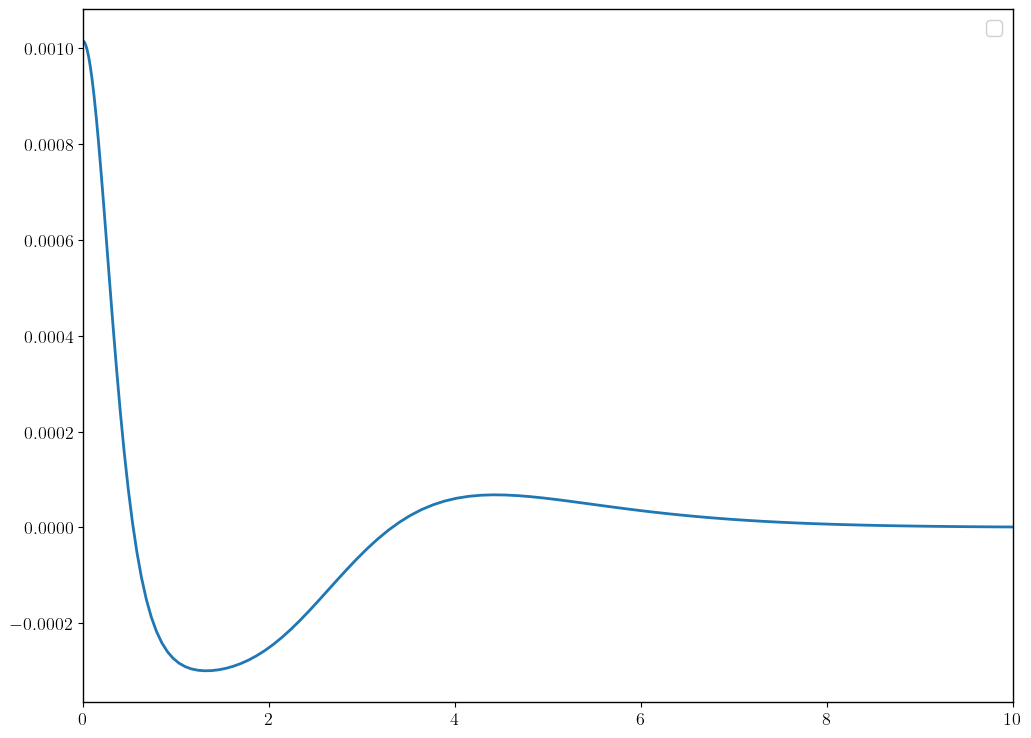

In [76]:
i=-7
#plt.plot((AutoVectNotM[-2][0][0])[1:-1], np.abs(AutoVectNotM[-2][0][2][0]/(AutoVectNotM[-2][0][2][0])[0]), ls='--')
plt.plot((AutoVectNotM[-2][0][0])[1:-1], np.imag(AutoVectNotM[-2][0][1][0]))
#plt.plot(radSigmMasaM1[i][0], np.abs(radSigmMasaM1[i][1]/radSigmMasaM1[i][1][0]), color=col[2], label=r'$\sigma_0 = %5.4f$'%radSigmMasa[i][1][0])
plt.xlim(0, 10)
#plt.ylim(1e-4, 1.1)
plt.legend()

#plt.yscale('log')